# GROUP ASSIGNMENT THE CODE COMMANDOS

## In code we trust, with commandos we conquer

<pre>
- Siebren Barten   (1756508)
- Puck de Bruin    (1665650)
- Jette Bruurs     (1746774)
- Jilke Nooijen    (1712616)
- Silke Peters     (1711210)
- Lyonne Vlaar     (1657313)
- Marijn ter Weeme (1703625)

First, install packages

In [214]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sn
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.model_selection import train_test_split
from scipy.spatial import cKDTree
import csv

Read cvs files for the first and second tested molecules and for the untested molecules

In [215]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [216]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


The df_untested is de dataframe with the 10.000 molecules. This dataframe is used to determine which molecules are ALDH1 inhibitors and which are not. 

In [217]:
df_untested=pd.read_csv("untested_molecules.csv")
SMILES_untested=df_untested['SMILES']

The first and second dataframes for the tested molecules will be combined

In [218]:
df= df1.append(df2,ignore_index=True)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
1995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
1996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
1997,O=C(CCl)NC1CCCc2ccccc21,1
1998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. Therefore we determine first all molecule descriptors and then filter missing values, duplicated rows and unique descriptors. 

In [219]:
def RDkit_descriptors(smiles):    
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])
Mol_descriptors_untested, desc_names_untested = RDkit_descriptors(df_untested['SMILES'])

In [220]:
df_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_descriptors_untested = pd.DataFrame(Mol_descriptors_untested, columns=desc_names_untested)
df_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,13.691100,0.017897,-3.332878,0.492481,251.330,237.218,251.089247,90,0,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,12.799172,0.210081,-3.948066,0.661884,267.350,250.214,267.092914,98,0,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,12.223679,0.646387,-3.783460,0.767040,223.703,209.591,223.076392,80,0,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,14.110619,0.366586,-4.404360,0.561228,423.542,398.342,423.172896,156,0,...,1,0,0,0,0,0,0,0,0,0


The absolute correlation between the variables is calculated and the variables are removed from the dataframe if the correlation is above 90%

In [247]:
correlation_matrix = df_descriptors.corr().abs()  # Find correlation between descriptors
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
# Drop descriptors if correlation is higher than the threshold           
df_filtered = df_descriptors.drop(columns=highly_correlated_columns)
df_untested_filtered=df_descriptors_untested.drop(columns=highly_correlated_columns)

The next part of code determines if the values for each descriptors are unique, meaning they have more than one possible value.
The descriptors that don't have unique values are dropped.

In [248]:
unique_descriptors = df_filtered.nunique() # Drop descripters if not unique
col_to_drop = unique_descriptors[unique_descriptors== 1].index
df_filtered=df_filtered.drop(col_to_drop, axis=1)
df_untested_filtered=df_untested_filtered.drop(col_to_drop, axis=1)

A dataframe is created that couples the descriptors to their SMILES and ALDH1 inhibition

In [249]:
df_merged = df.join(df_filtered)
df_merged_untested=df_untested_filtered.join(df_untested)

In this merged data frame missing values are searched

In [250]:
data_missing=df_merged.isnull() # Find if any values are missing
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


Duplicated rows are found and deleted, after this the index must be reset

In [251]:
df_duplicate = df_merged[df_merged.duplicated()] 
if len(df_duplicate)==0: 
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))
df_without_duplicates=df_merged.drop_duplicates().reset_index()
df_untested_filtered=df_merged_untested.drop_duplicates().reset_index()

The amount of duplicated rows is 25


Two lists are made that contain the ALDH1 inhibition and the SMILES and these columns are removed for the columns

In [252]:
label=df_without_duplicates["ALDH1_inhibition"]
SMILES=df_without_duplicates["SMILES"]

In [253]:
df_without_label=df_without_duplicates.drop("ALDH1_inhibition",axis=1)
df_without_label=df_without_label.drop("SMILES",axis=1).set_index("index")
desc_names=list(df_without_label.columns.values)

df_untested_without_SMILES=df_untested_filtered.drop("SMILES",axis=1).set_index("index")

The data is scaled with Standard scaling

In [254]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_without_label)
df_scaler = pd.DataFrame(df_scaler, columns=desc_names)

df_scaler_untested = scaler.fit_transform(df_untested_without_SMILES)
df_scaler_untested = pd.DataFrame(df_scaler_untested, columns=desc_names)

Determine how many principal components are needed for the analysis. Therefore we want to capture at least 90% of the dataset variance. 

,0
1,0.136164
2,0.202494
3,0.242669
4,0.278861
5,0.312828
...,...
154,1.000000
155,1.000000
156,1.000000
157,1.000000


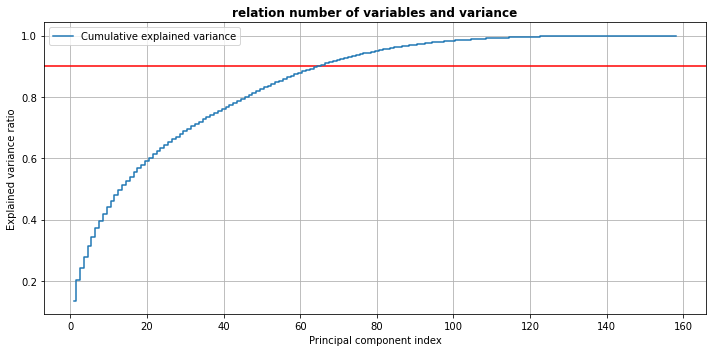

The number of variables needed for the PCA is: 66


In [255]:
pca = PCA()

# Determine transformed features
transformed_pca = pca.fit_transform(df_scaler)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('relation number of variables and variance', fontweight = 'bold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#print point where variance is first above 0.9 
for i in range(1,len(df_cum_sum)): 
    if df_cum_sum[0][i] >= 0.9: 
        number_of_variables = df_cum_sum[0].index[i]
        print('The number of variables needed for the PCA is:', number_of_variables)
        break

# Source: Ajitesh Kumar, April 14, 2023
# https://vitalflux.com/pca-explained-variance-concept-python-example/

Create dataframe where the amount of columns is equal to the amount of PC's that is needed for 90% explained variance. 

In [256]:
pca = PCA(n_components = number_of_variables)
components = pca.fit_transform(df_scaler)
df_components = pd.DataFrame(components)

components_untested = pca.fit_transform(df_scaler_untested)
df_components_untested = pd.DataFrame(components_untested)

df_components_untested

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,3.457544,-0.656865,-1.344433,1.924463,-1.966356,-1.254397,-4.115124,4.119859,3.821893,-1.955813,...,-1.222979,0.129630,0.463584,0.057785,-0.078552,-0.573950,0.477770,0.364208,-0.357545,-1.126894
1,5.811697,0.978045,0.580985,2.662107,-1.956471,-0.742848,-1.376511,-3.050009,-0.728820,0.025200,...,0.011914,-0.257363,0.314404,0.040377,0.105090,1.156745,-0.631260,0.067517,0.069081,1.265678
2,1.072364,3.782798,-4.945220,2.775466,0.250742,1.387567,3.403710,-3.151224,-0.216635,0.702588,...,-0.581186,-0.183122,0.585902,-1.202045,0.101937,-0.738003,0.613836,0.558039,0.519418,-1.223233
3,1.242748,1.674715,-4.802675,0.557700,1.686279,2.542385,1.258482,0.933732,4.379126,-0.111854,...,1.142935,-0.079007,-0.121688,-0.521572,1.486447,0.339554,0.556388,-1.558223,-1.749913,0.687705
4,0.515074,-1.513611,-2.506403,1.087905,5.738399,-2.613530,0.147515,-1.766387,2.754243,2.893174,...,-0.900427,0.682441,0.522711,-0.158187,-1.705242,-0.022583,0.131297,-1.008529,0.859330,0.312843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,-1.535092,-3.768725,-1.439537,-0.767479,4.101524,1.085015,0.971624,1.471976,0.456111,-4.948249,...,0.055000,0.608322,0.044019,-1.447662,0.028409,-0.149135,0.308070,-0.130901,-0.122452,-0.504108
9965,10.176629,3.674285,-6.011745,-0.334804,4.820813,2.615217,-4.756211,4.594970,0.386887,-3.950087,...,-0.654695,-0.533886,1.198859,0.335174,0.053763,-0.264651,0.964517,0.932949,-0.941425,-0.397383
9966,2.412009,4.060649,1.772952,-0.831104,0.643586,-2.313372,-1.415518,-3.895135,-0.577502,-0.751300,...,-0.314539,0.445032,-0.679202,0.996909,-0.272049,-0.008275,-0.359841,0.611162,0.431399,-0.981650
9967,3.026264,-5.911265,-1.235115,-7.380553,0.785887,0.108148,-0.646764,1.048369,2.154645,1.767979,...,-0.129262,2.657134,-1.803903,0.331931,0.030506,0.738150,1.586865,-0.052699,0.827706,0.786272


For visualisation purposes a 3d plot is created that shows the inhibition for the first three principle components. 

,PC1,PC2,PC3,ALDH1_inhibition
0,6.427579,-6.292197,0.280550,1
1,-1.188014,-4.544404,1.930637,1
2,5.865803,-5.288651,3.045932,1
3,-1.725377,2.899106,-1.167661,1
4,0.567952,-3.550437,-0.112656,1
...,...,...,...,...
1970,-0.423713,3.735142,-0.845430,1
1971,2.082881,3.622704,0.284014,1
1972,-0.529019,6.017853,0.642562,1
1973,3.431186,-3.500251,3.692557,1


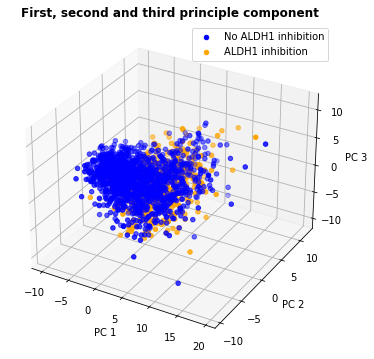

In [257]:
pca = PCA(n_components = number_of_variables)
transformed_plot = pca.fit_transform(df_scaler)
component_names = [f"PC{i+1}" for i in range(number_of_variables)]
df_scores=pd.DataFrame(data=transformed_plot, columns=component_names).iloc[:,:3]
inhibition=df["ALDH1_inhibition"]
df_scores["ALDH1_inhibition"]=inhibition

inh0_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC1"]
inh0_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC2"]
inh1_PC1=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC1"]
inh1_PC2=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC2"]
inh0_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 0,"PC3"]
inh1_PC3=df_scores.loc[df_scores["ALDH1_inhibition"] == 1,"PC3"]

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection="3d")
plt.title('First, second and third principal component', fontweight = 'bold')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.scatter3D(inh0_PC1, inh0_PC2, inh0_PC3, c="blue",label="0");
ax.scatter3D(inh1_PC1, inh1_PC2, inh1_PC3, c="orange",label="1");
ax.legend(labels=['No ALDH1 inhibition','ALDH1 inhibition'])
df_scores

Split the data in test data and trainings data with a ratio of 80% trainings data and 20% test data for the validation.

In [258]:
y = label
X = df_components
X_untested=df_components_untested
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_untested

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,3.457544,-0.656865,-1.344433,1.924463,-1.966356,-1.254397,-4.115124,4.119859,3.821893,-1.955813,...,-1.222979,0.129630,0.463584,0.057785,-0.078552,-0.573950,0.477770,0.364208,-0.357545,-1.126894
1,5.811697,0.978045,0.580985,2.662107,-1.956471,-0.742848,-1.376511,-3.050009,-0.728820,0.025200,...,0.011914,-0.257363,0.314404,0.040377,0.105090,1.156745,-0.631260,0.067517,0.069081,1.265678
2,1.072364,3.782798,-4.945220,2.775466,0.250742,1.387567,3.403710,-3.151224,-0.216635,0.702588,...,-0.581186,-0.183122,0.585902,-1.202045,0.101937,-0.738003,0.613836,0.558039,0.519418,-1.223233
3,1.242748,1.674715,-4.802675,0.557700,1.686279,2.542385,1.258482,0.933732,4.379126,-0.111854,...,1.142935,-0.079007,-0.121688,-0.521572,1.486447,0.339554,0.556388,-1.558223,-1.749913,0.687705
4,0.515074,-1.513611,-2.506403,1.087905,5.738399,-2.613530,0.147515,-1.766387,2.754243,2.893174,...,-0.900427,0.682441,0.522711,-0.158187,-1.705242,-0.022583,0.131297,-1.008529,0.859330,0.312843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,-1.535092,-3.768725,-1.439537,-0.767479,4.101524,1.085015,0.971624,1.471976,0.456111,-4.948249,...,0.055000,0.608322,0.044019,-1.447662,0.028409,-0.149135,0.308070,-0.130901,-0.122452,-0.504108
9965,10.176629,3.674285,-6.011745,-0.334804,4.820813,2.615217,-4.756211,4.594970,0.386887,-3.950087,...,-0.654695,-0.533886,1.198859,0.335174,0.053763,-0.264651,0.964517,0.932949,-0.941425,-0.397383
9966,2.412009,4.060649,1.772952,-0.831104,0.643586,-2.313372,-1.415518,-3.895135,-0.577502,-0.751300,...,-0.314539,0.445032,-0.679202,0.996909,-0.272049,-0.008275,-0.359841,0.611162,0.431399,-0.981650
9967,3.026264,-5.911265,-1.235115,-7.380553,0.785887,0.108148,-0.646764,1.048369,2.154645,1.767979,...,-0.129262,2.657134,-1.803903,0.331931,0.030506,0.738150,1.586865,-0.052699,0.827706,0.786272


Apply KNN and find the optimal amount of neighbours to determine the accuracy.

0.7269414679110496


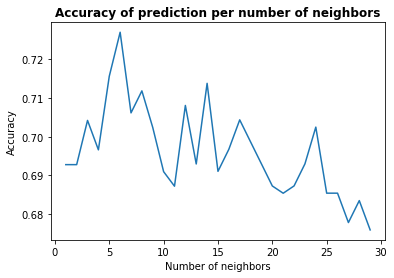

In [259]:
k_range = range(1,30)
scores = []
highest_value = 0
sub_highest_value = 0
optimal_k = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = metrics.balanced_accuracy_score(y_test, y_predict)
    scores.append(accuracy)
        
    if accuracy > sub_highest_value and accuracy <highest_value:
        sub_highest_value = accuracy
        sub_optimal_k = k
        
    if accuracy > highest_value:
        sub_highest_value =highest_value
        highest_value = accuracy
        sub_optimal_k = optimal_k
        optimal_k = k

plt.title('Accuracy of prediction per number of neighbors', fontweight = 'bold')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')

plt.plot(k_range, scores);
print(highest_value)

Calculate the balanced accuracy

In [260]:
neighbours = KNeighborsClassifier(n_neighbors=optimal_k)
neighbours.fit(X_train, y_train)
y_pred = neighbours.predict(X_test)
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
balanced_acc

0.6437089526443138

Predict what label the untested molecules have and save to dataframe

In [261]:
prediction_untested_molecules = neighbours.predict(X_untested)
df_pred_untested = pd.DataFrame(prediction_untested_molecules)
        
df_pred_untested = df_pred_untested.join(df_untested_filtered["SMILES"])
df_pred_untested 

,0,SMILES
0,0,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,0,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,0,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,0,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,0,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
...,...,...
9964,0,CCNC(=O)c1nc[nH]c1C(=O)NCC
9965,0,CCC(C)C(NC(=O)C(C)NC(=O)CNC(=O)CNC(=O)OCc1cccc...
9966,0,O=C(CSc1ncnc2ccccc12)Nc1cccc(S(=O)(=O)N2CCOCC2)c1
9967,0,Cc1cc(OCCOCC[NH+](C)CCO)cc(C)c1Cl


In the code below, SMILES is set as an index and only the SMILES of inhibitors are considered. 

In [262]:
df_pred_untested = df_pred_untested[[0, "SMILES"]]
df_components_untested["SMILES"] = df_pred_untested["SMILES"]
df_components_untested_smile = df_components_untested.set_index("SMILES")

df_inhibitors = pd.DataFrame()
for row in range(len(df_pred_untested)):
    if df_pred_untested[0][row] == 1:
        SMILE_inhibitor = df_pred_untested["SMILES"][row]
        df_inhibitors = df_inhibitors.append(df_components_untested_smile.loc[[SMILE_inhibitor]])
df_inhibitors

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
SMILES,,,,,,,,,,,,,,,,,,,,,
CC1(C)CC(=O)C2=C(C1)OC([NH3+])=C(C#N)[C@@]21C(=O)N(CC(N)=O)c2ccccc21,5.046302,0.307298,-1.034621,2.659391,3.424314,4.101949,4.764509,4.044290,2.314966,2.278988,...,0.067087,-1.274655,1.231813,1.538512,-0.670624,-1.013931,-0.805509,-0.607099,0.127189,-0.507304
CCOC(=O)C1CCN(C(=O)CN(c2ccc(OC)c(OC)c2)S(=O)(=O)c2ccccc2)CC1,8.613979,3.055084,-1.505719,-1.543100,-2.178175,1.931956,-3.037487,-2.969668,-2.751090,0.488899,...,0.084278,-0.434815,-0.007077,-0.156789,-0.012471,0.943411,-0.393167,-0.039655,-0.671449,0.283141
O=C(C1=C[C@H](c2ccc(C(F)(F)F)cc2)C[C@H](OCCCCO)O1)N1CC[NH+](Cc2ccccc2)CC1,9.710646,1.152474,-0.385947,-1.681830,-1.166071,-1.548637,0.140237,-0.819831,4.034130,4.302635,...,0.335214,-1.049224,0.973666,-1.051571,0.355590,-0.696370,1.428551,-0.550802,1.800358,-0.174966
COc1ccc(NC(=O)CC2C(=O)N(c3cccc(OC)c3)C(=O)N2C(C)C)cc1,5.641445,2.924713,-3.848610,-0.059317,-1.295778,-0.123336,0.982048,-0.054540,-3.532842,-1.846629,...,-0.099753,-0.359214,0.519584,0.143063,0.383416,-1.258137,0.633275,-0.518844,0.452353,-1.506953
Cc1cc(Cl)ccc1C(=O)C1CCCN(C(=O)c2cc(C(C)C)no2)C1,3.163713,-2.255998,2.268350,3.291884,-1.006781,-1.128163,-1.057992,0.236227,-0.012555,1.507990,...,0.417197,0.467870,-0.607542,0.270214,-0.594185,0.187617,0.077717,-0.094143,-0.925727,0.434324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O=C(CSc1nc(-c2ccco2)cc(C(F)(F)F)n1)Nc1ccc(C(=O)N2CCCCC2)cc1,4.163309,5.058894,1.170420,2.246334,1.345171,-1.792226,-0.738483,-1.676480,1.601061,2.665417,...,-0.182733,0.484902,-0.609107,0.254179,-0.618360,0.358278,0.795557,0.471182,0.041991,-0.922212
CCOC(=O)CC(NC(=O)Cn1nnc(-c2ccccc2F)n1)c1ccccc1Cl,0.511231,5.472927,1.457489,-0.174301,1.072946,0.198202,-2.668322,0.265732,1.299658,0.640934,...,-0.427194,0.270478,0.015845,0.242430,0.467692,-0.923691,0.787271,0.519386,0.240708,0.367562
COCCNC(=O)C(c1ccc(C)o1)N(Cc1ccc(OC)cc1)C(=O)Cn1nnc2ccccc21,4.690074,7.830638,1.898589,-2.081892,-2.045469,1.963609,-2.065513,1.606264,-0.202751,-2.110454,...,-0.769591,-0.247137,0.267001,0.707635,0.282696,-2.326237,-2.169073,-0.700462,-0.900896,-0.095405


Find coördinates of tested and untested smiles

In [263]:
df_components["SMILES"] = SMILES
df_components = df_components.set_index("SMILES")
dict_components = df_components.to_dict("index")
dict_components_untested = df_inhibitors.to_dict("index")
all_coordinates = []
for key in dict_components:
    value = dict_components[key]
    coordinate = []
    for pc in value:
        point = value[pc]
        coordinate.append(point)
    all_coordinates.append(coordinate)
    dict_components[key] = coordinate

all_coordinates_untested = []
for key in dict_components_untested:
    value = dict_components_untested[key]
    coordinate_untested = []
    for pc in value:
        point_untested = value[pc]
        coordinate_untested.append(point_untested)
    all_coordinates_untested.append(coordinate_untested)
    dict_components_untested[key] = coordinate_untested



In [264]:
# Set up variables 
key_list_tested = list(dict_components.keys())
value_list_tested = list(dict_components.values())  
key_list_untested = list(dict_components_untested.keys())
value_list_untested = list(dict_components_untested.values())
    
kd_tree1=cKDTree(all_coordinates_untested)
kd_tree2=cKDTree(all_coordinates)
indexes = kd_tree1.query_ball_tree(kd_tree2, r=10)

Find number of nearby neighbours 

In [265]:
dict_number_neighbours = {}
df_known_inhibitors = df.drop_duplicates().set_index("SMILES")
for i in range(len(indexes)):
    key = key_list_untested[value_list_untested.index(all_coordinates_untested[i])]
    value = 0
    for j in indexes[i]:
        nearby_smile = key_list_tested[value_list_tested.index(all_coordinates[j])]
        inhibition = df_known_inhibitors.loc[nearby_smile, "ALDH1_inhibition"]
        if inhibition == 1:
            value += 1
    if value != 0:
        dict_number_neighbours[key] = value

Select 100 best molecules and write to a CSV file

In [266]:
sorted_smiles_by_inhibitors = sorted(dict_number_neighbours.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_smiles_by_inhibitors)
keys_converted_dict = list(converted_dict.keys())
keys_converted_dict = [list([n]) for n in keys_converted_dict]
keys_converted_dict.insert(0, ['SMILES'])

first_100 = keys_converted_dict[1:101]
with open('Best_smiles_group7.csv', 'w', newline='') as csv_outfile:
    f = csv.writer(csv_outfile)
    f.writerows(first_100)